In [1]:
"""
Create dataset from directory
"""
import os

root = '/mnt/drive1/skripsi/'

workspace = os.path.join(root, 'testing23')

In [2]:
"""
Read dataset from single .h5
"""

import h5py
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import sys
from keras.utils import *


def initialize_data(dataset_file):
    f = h5py.File(dataset_file, 'r')
    image_dataset = []
    label_dataset = f['labels']
    for data in zip(f['images'], f['image_shapes']):
        image_dataset.append(data[0].reshape(data[1]))
    
    return image_dataset, label_dataset


def encode_label_alhpabet(arr):
    encoded_arr = np.zeros(len(arr)).astype(np.int32)
    for i, val in enumerate(arr, 0):
        if len(val) > 0:
            encoded_arr[i] = int(ord(val))-64
        else:
            encoded_arr[i] = 0
    return np.array(encoded_arr).astype(np.int32)


def encode_label_number(arr):
    encoded_arr = np.zeros(len(arr)).astype(np.int32)
    for i, val in enumerate(arr, 0):
        if len(val) > 0:
            encoded_arr[i] = int(float(val))+1
        else:
            encoded_arr[i] = 0
    return np.array(encoded_arr).astype(np.int32)


def encode_labels(labels):
    encoded_labels = []
    encoded_labels.append(np.array(labels[:, 0]).astype(np.int32))  # s1_0
    encoded_labels.append(encode_label_alhpabet(labels[:, 1]))  # s1_1
    encoded_labels.append(encode_label_alhpabet(labels[:, 2]))  # s1_2
    
    encoded_labels.append(np.array(labels[:, 3]).astype(np.int32))  # s2_0
    encoded_labels.append(encode_label_number(labels[:, 4]))  # s2_1
    encoded_labels.append(encode_label_number(labels[:, 5]))  # s2_2
    encoded_labels.append(encode_label_number(labels[:, 6]))  # s2_3
    encoded_labels.append(encode_label_number(labels[:, 7]))  # s2_4http://localhost:8888/?token=
    
    encoded_labels.append(np.array(labels[:, 8]).astype(np.int32))  # s3_0
    encoded_labels.append(encode_label_alhpabet(labels[:, 9]))  # s3_1
    encoded_labels.append(encode_label_alhpabet(labels[:, 10]))  # s3_2
    encoded_labels.append(encode_label_alhpabet(labels[:, 11]))  # s3_3
    
    return np.array(encoded_labels).T


def logitize_labels(labels):
    labels = np.array(labels)
    # Convert S2 labels to logits
    logits_s1_0 = np_utils.to_categorical(labels[:, 0], 3)
    logits_s1_1 = np_utils.to_categorical(labels[:, 1], 27)
    logits_s1_2 = np_utils.to_categorical(labels[:, 2], 27)
    s1_logits = np.hstack([logits_s1_0, logits_s1_1, logits_s1_2])
    
    # Convert S2 labels to logits
    logits_s2_0 = np_utils.to_categorical(labels[:, 3], 5) 
    logits_s2_1 = np_utils.to_categorical(labels[:, 4], 11) 
    logits_s2_2 = np_utils.to_categorical(labels[:, 5], 11) 
    logits_s2_3 = np_utils.to_categorical(labels[:, 6], 11) 
    logits_s2_4 = np_utils.to_categorical(labels[:, 7], 11)
    s2_logits = np.hstack([logits_s2_0, logits_s2_1, logits_s2_2, logits_s2_3, logits_s2_4])
    
    # Convert S3 labels to logits
    logits_s3_0 = np_utils.to_categorical(labels[:, 8], 4)
    logits_s3_1 = np_utils.to_categorical(labels[:, 9], 27)
    logits_s3_2 = np_utils.to_categorical(labels[:, 10], 27)
    logits_s3_3 = np_utils.to_categorical(labels[:, 11], 27)
    s3_logtis = np.hstack([logits_s3_0, logits_s3_1, logits_s3_2, logits_s3_3])
    
    return np.hstack([s1_logits, s2_logits, s3_logtis])


image_dataset, label_dataset = initialize_data(os.path.join(workspace, 'dataset.h5'))

# Encode label to number
encoded_labels = encode_labels(label_dataset)

# Logitize label
logitized_labels = logitize_labels(encoded_labels) 

# Testing
test_id = np.random.choice(len(image_dataset))
plt.imshow(image_dataset[test_id])
print(str(label_dataset[test_id]))
print(str(encoded_labels[test_id]))
print(str(logitized_labels[test_id]))

Using TensorFlow backend.


['1' 'G' '' '4' '6' '1' '2' '1' '2' 'R' 'S' '']
[ 1  7  0  4  7  2  3  2  2 18 19  0]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


['2' 'A' 'D' '4' '2' '9' '9' '3' '3' 'A' 'L' 'B']
[ 2  1  4  4  3 10 10  4  3  1 12  2]
[0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


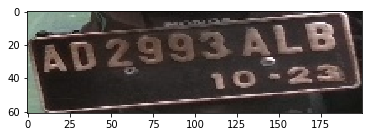

In [3]:
# Testing
test_id = np.random.choice(len(image_dataset))
plt.imshow(image_dataset[test_id])
print(str(label_dataset[test_id]))
print(encoded_labels[test_id])
print(logitized_labels[test_id])


In [4]:
"""
Image resizing
"""
import cv2 as cv2
input_dim = (200, 61)
def image_resizer(images, dim):
    i = 0
    resized_images = [] 
    for i, image in enumerate(images, i):
        resized_image = cv2.resize(image, dim, interpolation=cv2.INTER_LINEAR)
        resized_images.append(resized_image)
    resized_images = np.array(resized_images)
    return resized_images

# Resize semua dataset untuk inferencing
test_dataset = image_resizer(image_dataset, input_dim)
test_dataset.shape


(398, 61, 200, 3)

[1, 11, 0, 4, 3, 4, 4, 10, 2, 13, 21, 0]
s1 :  [1, 11, 0]
[0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
s2 :  [4, 3, 4, 4, 10]
[0. 0. 0. 0. 1.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
s3 :  [2, 13, 21, 0]
[0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]


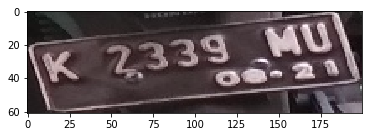

In [5]:

"""
Sanity Checking
"""
from matplotlib import pyplot as plt

label_helper = {'m_s1': slice(0, 3), 
                's1_1': slice(3, 30),
                's1_2': slice(30, 57),
                'm_s2': slice(57, 62),
                's2_1': slice(62, 73), 
                's2_2': slice(73, 84), 
                's2_3': slice(84, 95),
                's2_4': slice(95, 106),
                'm_s3': slice(106, 110), 
                's3_1': slice(110, 137),
                's3_2': slice(137, 164), 
                's3_3': slice(164, 191)}

def logits_decoder(label):
    # Convert label to readable character
    s1_0 = label[0:3]
    s1_1 = label[3:30]
    s1_2 = label[30:57]
    
    s2_0 = label[57:62]
    s2_1 = label[62:73]
    s2_2 = label[73:84]
    s2_3 = label[84:95]
    s2_4 = label[95:106]
    
    s3_0 = label[106:110]
    s3_1 = label[110:137]
    s3_2 = label[137:164]
    s3_3 = label[164:191]
    
    s1_0 = np.argmax(s1_0)
    s1_1 = np.argmax(s1_1)
    s1_2 = np.argmax(s1_2)
    
    s2_0 = np.argmax(s2_0)
    s2_1 = np.argmax(s2_1)
    s2_2 = np.argmax(s2_2)
    s2_3 = np.argmax(s2_3)
    s2_4 = np.argmax(s2_4)
    
    s3_0 = np.argmax(s3_0)
    s3_1 = np.argmax(s3_1)
    s3_2 = np.argmax(s3_2)
    s3_3 = np.argmax(s3_3)
    
    s1 = [s1_0, s1_1, s1_2]
    s2 = [s2_0, s2_1, s2_2, s2_3, s2_4]
    s3 = [s3_0, s3_1, s3_2, s3_3]
    return [s1_0, s1_1, s1_2, s2_0, s2_1, s2_2, s2_3, s2_4, s3_0, s3_1, s3_2, s3_3]


def label_decoder(label):
    """
    Label Decoder
    Output real value from the label
    e.g 'AE 2343 PY'
    """
    alphabet_dict = " ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    number_dict = " 0123456789"
    s1 = ''
    s1 += alphabet_dict[label[1]]
    s1 += alphabet_dict[label[2]]
    
    s2 = ''
    s2 += number_dict[label[4]]
    s2 += number_dict[label[5]]
    s2 += number_dict[label[6]]
    s2 += number_dict[label[7]]
    
    s3 = ''
    s3 += alphabet_dict[label[9]] 
    s3 += alphabet_dict[label[10]] 
    s3 += alphabet_dict[label[11]]
    
    return s1 + ' ' + s2 + ' ' + s3  


select = np.random.choice(len(test_dataset))
plt.imshow(test_dataset[select])
logitized_labels = logitized_labels
# print(train_labels[select])
# sys.exit()
print(logits_decoder(logitized_labels[select]))
# Check S1
print('s1 : ', str(logits_decoder(logitized_labels[select])[0:3]))
print(str(logitized_labels[select, label_helper['m_s1']]))
print(str(logitized_labels[select, label_helper['s1_1']]))
print(str(logitized_labels[select, label_helper['s1_2']]))

# Check S2
print('s2 : ', str(logits_decoder(logitized_labels[select])[3:8]))
print(str(logitized_labels[select, label_helper['m_s2']]))
print(str(logitized_labels[select, label_helper['s2_1']]))
print(str(logitized_labels[select, label_helper['s2_2']]))
print(str(logitized_labels[select, label_helper['s2_3']]))
print(str(logitized_labels[select, label_helper['s2_4']]))

# Check S3
print('s3 : ', str(logits_decoder(logitized_labels[select])[8:12]))
print(str(logitized_labels[select, label_helper['m_s3']]))
print(str(logitized_labels[select, label_helper['s3_1']]))
print(str(logitized_labels[select, label_helper['s3_2']]))
print(str(logitized_labels[select, label_helper['s3_3']]))



In [6]:

"""
Open Model
"""
# load json and create model
from keras.engine.saving import model_from_json

json_file = open(os.path.join(workspace, 'model_final.json'), 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(os.path.join(workspace, "extractor_model-final_epoch-13_loss-2.3397_val_loss-1.4501.h5"))
print("Loaded model from disk")
# plot_model(loaded_model, show_shapes=True, to_file=os.path.join(dataset_dir, 'loaded_modelz5.jpg'))


Loaded model from disk


In [7]:
"""
Plate Loss function
"""

from keras import backend as K
from keras.optimizers import SGD

def plate_loss(y_true, y_pred):
    loss_s1_0 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['m_s1']], y_pred[:, label_helper['m_s1']]))
    loss_s1_1 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['s1_1']], y_pred[:, label_helper['s1_1']]))
    loss_s1_2 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['s1_2']], y_pred[:, label_helper['s1_2']]))
    
    loss_s2_0 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['m_s2']], y_pred[:, label_helper['m_s2']]))
    loss_s2_1 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['s2_1']], y_pred[:, label_helper['s2_1']]))
    loss_s2_2 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['s2_2']], y_pred[:, label_helper['s2_2']]))
    loss_s2_3 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['s2_3']], y_pred[:, label_helper['s2_3']]))
    loss_s2_4 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['s2_4']], y_pred[:, label_helper['s2_4']]))
    
    loss_s3_0 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['m_s3']], y_pred[:, label_helper['m_s3']]))
    loss_s3_1 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['s3_1']], y_pred[:, label_helper['s3_1']]))
    loss_s3_2 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['s3_2']], y_pred[:, label_helper['s3_2']]))
    loss_s3_3 = K.mean(K.categorical_crossentropy(y_true[:, label_helper['s3_3']], y_pred[:, label_helper['s3_3']]))
    
    loss_s1 = loss_s1_0 + loss_s1_1 + loss_s1_2
    loss_s2 = loss_s2_0 + loss_s2_1 + loss_s2_2 + loss_s2_3 + loss_s2_4
    loss_s3 = loss_s3_0 + loss_s3_1 + loss_s3_2 + loss_s3_3
    return loss_s1 + loss_s2 + loss_s3

def character_acc2(y_true, y_pred):
    s1_0 = K.equal(K.argmax(y_true[:, label_helper['m_s1']]), K.argmax(y_pred[:, label_helper['m_s1']]))
    s1_1 = K.equal(K.argmax(y_true[:, label_helper['s1_1']]), K.argmax(y_pred[:, label_helper['s1_1']]))
    s1_2 = K.equal(K.argmax(y_true[:, label_helper['s1_2']]), K.argmax(y_pred[:, label_helper['s1_2']]))
    
    s2_0 = K.equal(K.argmax(y_true[:, label_helper['m_s2']]), K.argmax(y_pred[:, label_helper['m_s2']]))
    s2_1 = K.equal(K.argmax(y_true[:, label_helper['s2_1']]), K.argmax(y_pred[:, label_helper['s2_1']]))
    s2_2 = K.equal(K.argmax(y_true[:, label_helper['s2_2']]), K.argmax(y_pred[:, label_helper['s2_2']]))
    s2_3 = K.equal(K.argmax(y_true[:, label_helper['s2_3']]), K.argmax(y_pred[:, label_helper['s2_3']]))
    s2_4 = K.equal(K.argmax(y_true[:, label_helper['s2_4']]), K.argmax(y_pred[:, label_helper['s2_4']]))
    
    s3_0 = K.equal(K.argmax(y_true[:, label_helper['m_s3']]), K.argmax(y_pred[:, label_helper['m_s3']]))
    s3_1 = K.equal(K.argmax(y_true[:, label_helper['s3_1']]), K.argmax(y_pred[:, label_helper['s3_1']]))
    s3_2 = K.equal(K.argmax(y_true[:, label_helper['s3_2']]), K.argmax(y_pred[:, label_helper['s3_2']]))
    s3_3 = K.equal(K.argmax(y_true[:, label_helper['s3_3']]), K.argmax(y_pred[:, label_helper['s3_3']]))
    
    s1 = K.mean(s1_0) + K.mean(s1_1) + K.mean(s1_2)
    s2 = K.mean(s2_0) + K.mean(s2_1) + K.mean(s2_2) + K.mean(s2_3) + K.mean(s2_4)
    s3 = K.mean(s3_0) + K.mean(s3_1) + K.mean(s3_2) + K.mean(s3_3)
    # return (K.mean(s1_1) + K.mean(s1_2) + K.mean(s2_1) + K.mean(s2_2) + K.mean(s2_3) + K.mean(s2_4) + K.mean(s3_1) + K.mean(s3_2) + K.mean(s3_3)) / 9
    return (s1+s2+s3)/12
"""
Compile Model
"""
loaded_model.compile(optimizer=SGD(lr=0.001, momentum=0.8), loss=plate_loss, metrics=[character_acc2])
loaded_model.evaluate(x=test_dataset, y=logitized_labels)
# loaded_model.predict(x=test_dataset)

398/398 [==============================] - 6s 16ms/step


[5.977688858856508, 0.874581257901599]

D  2000 YOU


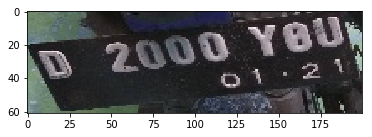

In [11]:
"""
prediction
"""
def decode_all(prediction):
    prediction = map(logits_decoder, list(prediction))
    prediction = map(label_decoder, list(prediction))
    prediction = list(prediction)
    return prediction

select = np.random.choice(len(test_dataset))
prediction = loaded_model.predict(x=test_dataset)
prediction = decode_all(prediction)
plt.imshow(test_dataset[select])
print(prediction[select])

In [12]:
"""
Use this to export prediction to .csv for further analysis
"""
ground_truth = decode_all(logitized_labels)
df = pd.DataFrame(data={
    'prediction': prediction, 
    'ground truth': ground_truth, 
})
df.to_csv(os.path.join(workspace, 'prediction.csv'), index=False)

In [13]:
z = list(map(lambda x: x.split(), prediction))
z[3][0]

'AD'

In [14]:
"""
Save prediction and ground truth into labels template 
"""


def labelizer(prediction_arr):
    """
    Convert prediction to format like in labels.csv
    :param prediction_arr: 
    :return: 
    """
    # Container for each component
    label_s1 = [[], [], []]  # s1_0, s1_1, s1_2
    label_s2 = [[], [], [], [], []]  # s2_0, s2_1, s2_2, s2_3, s2_4
    label_s3 = [[], [], [], []]  # s3_0, s3_1, s3_2, s3_3
    
    # Split by space to s1, s2, s3
    prediksi = np.array(list(map(lambda x: x.split(), prediction_arr)))
    s1s = prediksi[:, 0]
    s2s = prediksi[:, 1]
    s3s = prediksi[:, 2]
    
    for s1, s2, s3 in zip(s1s, s2s, s3s):
        label_s1[0].append(len(s1))
        for i in range(2):
            try:
                label_s1[i + 1].append(s1[i])
            except Exception as e:
                label_s1[i + 1].append("")
                pass
    
        label_s2[0].append(len(s2))
        for i in range(4):
            try:
                label_s2[i + 1].append(s2[i])
            except Exception as e:
                label_s2[i + 1].append("")
                pass
    
        label_s3[0].append(len(s3))
        for i in range(3):
            try:
                label_s3[i + 1].append(s3[i])
            except Exception as e:
                label_s3[i + 1].append("")
                pass
            
    return ({'s1': label_s1,'s2': label_s2, 's3': label_s3})
            

def save_labels(labels, filename):
    """
    Save labels to csv file
    :param labels: 
    :param filename: 
    :return: 
    """
    label_s1 = labels['s1']
    label_s2 = labels['s2']
    label_s3 = labels['s3']
    # Save the labels to .csv
    df1 = pd.DataFrame(data={'s1_0': label_s1[0],
                             's1_1': label_s1[1],
                             's1_2': label_s1[2]})

    df2 = pd.DataFrame(data={'s2_0': label_s2[0],
                             's2_1': label_s2[1],
                             's2_2': label_s2[2],
                             's2_3': label_s2[3],
                             's2_4': label_s2[4]})

    df3 = pd.DataFrame(data={'s3_0': label_s3[0],
                             's3_1': label_s3[1],
                             's3_2': label_s3[2],
                             's3_3': label_s3[3]})

    final_labels = pd.concat([df1, df2, df3], axis=1)
    final_labels.to_csv(os.path.join(workspace, filename), index=False)


formatted_prediction = labelizer(prediction)
save_labels(formatted_prediction, "formatted_prediction.csv")

formatted_ground_truth = labelizer(ground_truth)
save_labels(formatted_ground_truth, "formatted_ground_truth.csv")



In [15]:
len(formatted_ground_truth["s1"][1])

398

In [16]:
"""
Analyze the labels
"""


def analyze(predictions, ground_truths):
    """
    Analyze the result into interesting statistic
    :param prediction: formatted prediction
    :param ground_truth: formatted ground truth
    :return: 
    """
    alphabet_dict = " ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    number_dict = " 0123456789"
    
    gt_s1 = ground_truths['s1']
    gt_s2 = ground_truths['s2']
    gt_s3 = ground_truths['s3']
    
    p_s1 = predictions['s1']
    p_s2 = predictions['s2']
    p_s3 = predictions['s3']
    """
    Buat variabel untuk banyak karakter dan jumlah benar 
    gt = ground truth
    p = prediksi 
    """
    # p = [[], [], [], [], [], [], [], [], []]  # s1_1, s1_2, s2_1, s2_2, s2_3, s2_4, s3_1, s3_2, s3_3
    total_gt_s1 = np.zeros((2, 26)).astype(np.int32)  # s1
    total_gt_s2 = np.zeros((4, 26)).astype(np.int32)  # s2 
    total_gt_s3 = np.zeros((4, 26)).astype(np.int32)  # s3
    
    statistic_s1 = np.zeros((2, 26)).astype(np.int32)
    statistic_s2 = np.zeros((4, 26)).astype(np.int32)
    statistic_s3 = np.zeros((3, 26)).astype(np.int32)
    
    # looping tiap data
    for i in range(len(prediction)):
        # Ground truth
        gt_s1_1 = gt_s1[1][i]
        gt_s1_2 = gt_s1[2][i]
        
        gt_s2_1 = gt_s2[1][i]
        gt_s2_2 = gt_s2[2][i]
        gt_s2_3 = gt_s2[3][i]
        gt_s2_4 = gt_s2[4][i]
        
        gt_s3_1 = gt_s3[1][i]
        gt_s3_2 = gt_s3[2][i]
        gt_s3_3 = gt_s3[3][i]
        
        # Prediction
        p_s1_1 = p_s1[1][i]
        p_s1_2 = p_s1[2][i]
        
        p_s2_1 = p_s2[1][i]
        p_s2_2 = p_s2[2][i]
        p_s2_3 = p_s2[3][i]
        p_s2_4 = p_s2[4][i]
        
        p_s3_1 = p_s3[1][i]
        p_s3_2 = p_s3[2][i]
        p_s3_3 = p_s3[3][i]
        
        # looping tiap karakter
        # cek apakah kosong, kalau kosong berarti gak ada proses
        
        # s1_1
        if len(gt_s1_1) > 0:
            # cek termasuk karakter apa, lalu masukkan ke tiap bagian
            total_gt_s1[0][ord(gt_s1_1) - 65] += 1
            # cek apakah prediksi sama dengan GT   
            if(gt_s1_1 == p_s1_1):
                statistic_s1[0][ord(gt_s1_1) - 65] += 1
        # s1_2
        if len(gt_s1_2) > 0:
            # cek termasuk karakter apa, lalu masukkan ke tiap bagian
            total_gt_s1[1][ord(gt_s1_2) - 65] += 1
            # cek apakah prediksi sama dengan GT   
            if(gt_s1_2 == p_s1_2):
                statistic_s1[1][ord(gt_s1_2) - 65] += 1
                
        # s2_1
        if len(gt_s2_1) > 0:
            # cek termasuk karakter apa, lalu masukkan ke tiap bagian
            total_gt_s2[0][ord(gt_s2_1) - 48] += 1
            # cek apakah prediksi sama dengan GT   
            if(gt_s2_1 == p_s2_1):
                statistic_s2[0][ord(gt_s2_1) - 48] += 1
        # s2_2
        if len(gt_s2_2) > 0:
            # cek termasuk karakter apa, lalu masukkan ke tiap bagian
            total_gt_s2[1][ord(gt_s2_2) - 48] += 1
            # cek apakah prediksi sama dengan GT   
            if(gt_s2_2 == p_s2_2):
                statistic_s2[1][ord(gt_s2_2) - 48] += 1
        # s2_3
        if len(gt_s2_3) > 0:
            # cek termasuk karakter apa, lalu masukkan ke tiap bagian
            total_gt_s2[2][ord(gt_s2_3) - 48] += 1
            # cek apakah prediksi sama dengan GT   
            if(gt_s2_3 == p_s2_3):
                statistic_s2[2][ord(gt_s2_3) - 48] += 1
        # s2_4
        if len(gt_s2_4) > 0:
            # cek termasuk karakter apa, lalu masukkan ke tiap bagian
            total_gt_s2[3][ord(gt_s2_4) - 48] += 1
            # cek apakah prediksi sama dengan GT   
            if(gt_s2_4 == p_s2_4):
                statistic_s2[3][ord(gt_s2_4) - 48] += 1
                
        # s3_1
        if len(gt_s3_1) > 0:
            # cek termasuk karakter apa, lalu masukkan ke tiap bagian
            total_gt_s3[0][ord(gt_s3_1) - 65] += 1
            # cek apakah prediksi sama dengan GT   
            if(gt_s3_1 == p_s3_1):
                statistic_s3[0][ord(gt_s3_1) - 65] += 1
        # s3_2
        if len(gt_s3_2) > 0:
            # cek termasuk karakter apa, lalu masukkan ke tiap bagian
            total_gt_s3[1][ord(gt_s3_2) - 65] += 1
            # cek apakah prediksi sama dengan GT   
            if(gt_s3_2 == p_s3_2):
                statistic_s3[1][ord(gt_s3_2) - 65] += 1
        # s3_3
        if len(gt_s3_3) > 0:
            # cek termasuk karakter apa, lalu masukkan ke tiap bagian
            total_gt_s3[2][ord(gt_s3_3) - 65] += 1
            # cek apakah prediksi sama dengan GT   
            if(gt_s3_3 == p_s3_3):
                statistic_s3[2][ord(gt_s3_3) - 65] += 1
                
    # Save into .csv
    df1 = pd.DataFrame(data={
        "s1_1": total_gt_s1[0],  # S1
        "s1_2": total_gt_s1[1], 
        "s2_1": total_gt_s2[0],  # S2
        's2_2': total_gt_s2[1],
        's2_3': total_gt_s2[2],
        's2_4': total_gt_s2[3],
        's3_1': total_gt_s3[0],  # S3
        's3_2': total_gt_s3[1],
        's3_3': total_gt_s3[2]
    })
    df2 = pd.DataFrame(data={
        "s1_1": statistic_s1[0],  # S1
        "s1_2": statistic_s1[1], 
        "s2_1": statistic_s2[0],  # S2
        's2_2': statistic_s2[1],
        's2_3': statistic_s2[2],
        's2_4': statistic_s2[3],
        's3_1': statistic_s3[0],  # S3
        's3_2': statistic_s3[1],
        's3_3': statistic_s3[2]
    })
    df1.to_csv(os.path.join(workspace, 'total_statistic.csv'))
    df2.to_csv(os.path.join(workspace, 'matched_statistic.csv'))


analyze(formatted_prediction, formatted_ground_truth)

(61, 200, 3)

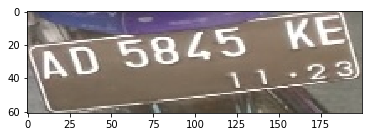

In [153]:
gambar = np.array(test_dataset[1])
plt.imshow(gambar)
panjang = len(gambar)
tinggi = len(gambar[0])
gambar1 = gambar[:, 0:int(tinggi/2)]
gambar2 = gambar[:, int(tinggi/2)::]

gambar.shape

True

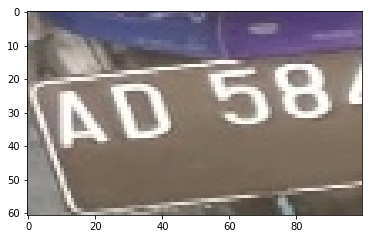

In [154]:
plt.imshow(gambar1)
cv2.imwrite(os.path.join(workspace, "gambar1.jpg"), gambar1)

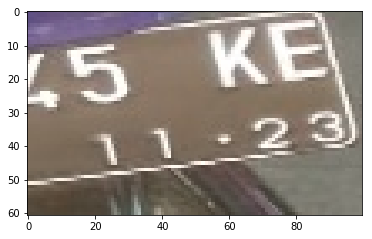

In [155]:
plt.imshow(gambar2)